## Case study on grain yields
Apply your function writing skills to a case study involving data preparation, visualization, and modeling.

### Converting areas to metric 1
In this chapter, you'll be working with grain yield data from the United States Department of Agriculture, 
National Agricultural Statistics Service. Unfortunately, they report all areas in acres. So, the first thing 
you need to do is write some utility functions to convert areas in acres to areas in hectares.
To solve this exercise, you need to know the following:
There are 4840 square yards in an acre.
There are 36 inches in a yard and one inch is 0.0254 meters.
There are 10000 square meters in a hectare.

In [ ]:
# Write a function, acres_to_sq_yards(), to convert areas in acres to areas in square yards. 
# This should take a single argument, acres.

acres_to_sq_yards <- function(acres) {
  acres * 4840
}

# Write a function, yards_to_meters(), to convert distances in yards to distances in meters. 
# This should take a single argument, yards.

yards_to_meters <- function(yards) {
  yards * 36 * 0.0254
}

# Write a function, sq_meters_to_hectares(), to convert areas in square meters to areas in hectares. 
# This should take a single argument, sq_meters.

sq_meters_to_hectares <- function(sq_meters) {
  sq_meters/10000
}

### Converting areas to metric 2
You're almost there with creating a function to convert acres to hectares. You need another utility function to deal 
with getting from square yards to square meters. Then, you can bring everything together to write the overall # 
acres-to-hectares conversion function. Finally, in the next exercise you'll be calculating area conversions 
in the denominator of a ratio, so you'll need a harmonic acre-to-hectare conversion function.

In [6]:
# install.packages("magrittr")
library(magrittr)
library(dplyr)

# Write a function to convert distance in square yards to square meters. It should take the square root of the input, 
# then convert yards to meters, then square the result.

# Write a function to convert sq. yards to sq. meters
sq_yards_to_sq_meters <- function(sq_yards) {
  sq_yards %>%
    # Take the square root
    sqrt() %>%
    # Convert yards to meters
    yards_to_meters() %>%
    # Square it
    raise_to_power(2)
}

# Write a function to convert areas in acres to hectares. The function should convert the input 
# from acres to square yards, then to square meters, then to hectares.

acres_to_hectares <- function(acres) {
  acres %>%
    # Convert acres to sq yards
    acres_to_sq_yards() %>%
    # Convert sq yards to sq meters
    sq_yards_to_sq_meters()%>%
    # Convert sq meters to hectares
    sq_meters_to_hectares()
}

# Write a function to calculate the reciprocal
get_reciprocal <- function(x) {
   1/x
}

# Write a function to harmonically convert areas in acres to hectares. The function should get the reciprocal of the input, 
# then convert from acres to hectares, then get the reciprocal again.

harmonic_acres_to_hectares <- function(acres) {
  acres %>% 
    # Get the reciprocal
    get_reciprocal() %>%
    # Convert acres to hectares
    acres_to_hectares() %>% 
    # Get the reciprocal again
    get_reciprocal()
}


### Converting yields to metric
The yields in the NASS corn data are also given in US units, namely bushels per acre. You'll need to write some 
more utility functions to convert this unit to the metric unit of kg per hectare.
Bushels historically meant a volume of 8 gallons, but in the context of grain, they are now defined as masses. 
This mass differs for each grain! To solve this exercise, you need to know these facts.

One pound (lb) is 0.45359237 kilograms (kg).

One bushel is 48 lbs of barley, 56 lbs of corn, or 60 lbs of wheat.

In [12]:
# Write a function to convert lb to kg
lbs_to_kgs <- function(lb){
   lb*0.45359237 
}

# Write a function to convert masses in bushels to lbs. This should take two arguments, bushels and crop. 
# It should define a lookup vector of scale factors for each crop (barley, corn, wheat), extract the scale factor for the crop, 
# then multiply this by the number of bushels.

# Write a function to convert bushels to lbs
bushels_to_lbs <- function(bushels, crop) {
  # Define a lookup table of scale factors
  c(barley = 48, corn = 56, wheat = 60) %>%
    # Extract the value for the crop
    extract(crop) %>%
    # Multiply by the no. of bushels
    multiply_by(bushels)
}

# Write a function to convert masses in bushels to kgs. This should take two arguments, bushels and crop. 
# It should convert the mass in bushels to lbs then to kgs.
bushels_to_kgs <- function(bushels, crop) {
  bushels %>%
    # Convert bushels to lbs for this crop
    bushels_to_lbs(crop) %>%
    # Convert lbs to kgs
    lbs_to_kgs()
}

# Write a function to convert yields in bushels/acre to kg/ha. The arguments should be bushels_per_acre and crop. 
# Three choices of crop should be allowed: "barley", "corn", and "wheat". It should match the crop argument, 
# then convert bushels to kgs, then convert harmonic acres to hectares.

bushels_per_acre_to_kgs_per_hectare <- function(bushels_per_acre, crop = c("barley", "corn", "wheat")) {
  # Match the crop argument
  crop <- match.arg(crop)
  bushels_per_acre %>%
    # Convert bushels to kgs for this crop
    bushels_to_kgs(crop) %>%
    # Convert harmonic acres to ha
    harmonic_acres_to_hectares()
}

### Applying the unit conversion
Now that you've written some functions, it's time to apply them! The NASS corn dataset is available, 
and you can fortify it (jargon for "adding new columns") with metrics areas and yields.
This fortification process can also be turned in to a function, so you'll define a function for this, 
and test it on the NASS wheat dataset.
Look at the corn dataset. Add two columns: farmed_area_ha should be farmed_area_acres converted to hectares; 
yield_kg_per_ha should be yield_bushels_per_acre converted to kilograms per hectare.

In [23]:
corn <- readRDS(file = "nass.corn.rds")
print(head(corn))

corn <- corn %>%
  # Add some columns
  mutate(
    # Convert farmed area from acres to ha
    farmed_area_ha = acres_to_hectares(farmed_area_acres),
    # Convert yield from bushels/acre to kg/ha
    yield_kg_per_ha = bushels_per_acre_to_kgs_per_hectare(
      yield_bushels_per_acre,
      crop = "corn"
    )
  )

print(head(corn))

  year       state farmed_area_acres yield_bushels_per_acre
1 1866     Alabama           1050000                      9
2 1866    Arkansas            280000                     18
3 1866  California             42000                     28
4 1866 Connecticut             57000                     34
5 1866    Delaware            200000                     23
6 1866     Florida            125000                      9
  year       state farmed_area_acres yield_bushels_per_acre farmed_area_ha
1 1866     Alabama           1050000                      9      424919.92
2 1866    Arkansas            280000                     18      113311.98
3 1866  California             42000                     28       16996.80
4 1866 Connecticut             57000                     34       23067.08
5 1866    Delaware            200000                     23       80937.13
6 1866     Florida            125000                      9       50585.71
  yield_kg_per_ha
1         564.909
2        1129.818
3

In [30]:
# Wrap the mutation code into a function, fortify_with_metric_units. 
# This should take two arguments, data and crop with no defaults.

# Wrap this code into a function
fortify_with_metric_units <- function(data, crop){
  data %>%
    mutate(
      farmed_area_ha = acres_to_hectares(farmed_area_acres),
      yield_kg_per_ha = bushels_per_acre_to_kgs_per_hectare(
        yield_bushels_per_acre, 
        crop = crop
      )
    )
}

# Use fortify_with_metric_units() on the wheat dataset.
# read data
wheat <- readRDS(file = "nass.wheat.rds")
# Try it on the wheat dataset
wheat <- fortify_with_metric_units(wheat, "wheat")
print(head(wheat))

  year       state farmed_area_acres yield_bushels_per_acre farmed_area_ha
1 1866     Alabama            125000                    5.0     50585.7053
2 1866    Arkansas             50000                    6.5     20234.2821
3 1866  California            650000                   18.0    263045.6675
4 1866 Connecticut              2000                   17.5       809.3713
5 1866    Delaware             59000                   11.0     23876.4529
6 1866     Georgia            245000                    4.0     99147.9823
  yield_kg_per_ha
1        336.2553
2        437.1320
3       1210.5192
4       1176.8937
5        739.7618
6        269.0043


### Plotting yields over time
Now that the units have been dealt with, it's time to explore the datasets. 
An obvious question to ask about each crop is, "how do the yields change over time in each US state?" 
Let's draw a line plot to find out!

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


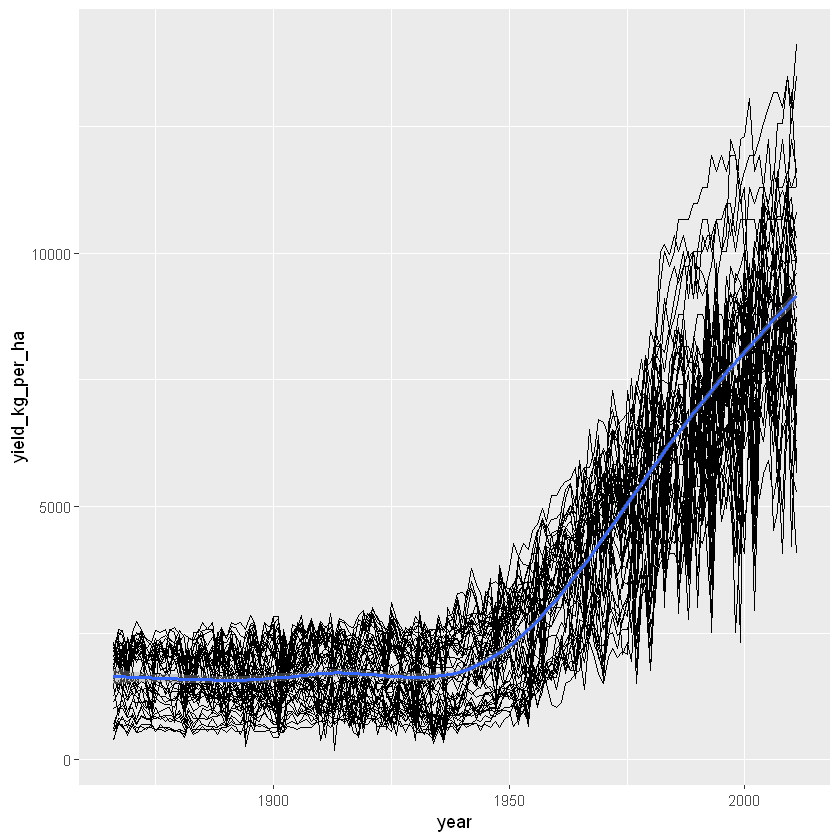

In [25]:
# install.packages("ggplot2")
library(ggplot2)


# Using corn, plot yield (kg/ha) vs. year
ggplot(corn, aes(year, yield_kg_per_ha)) +
  # Add a line layer, grouped by state
  geom_line(aes(group = state)) +
  # Add a smooth trend layer
  geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


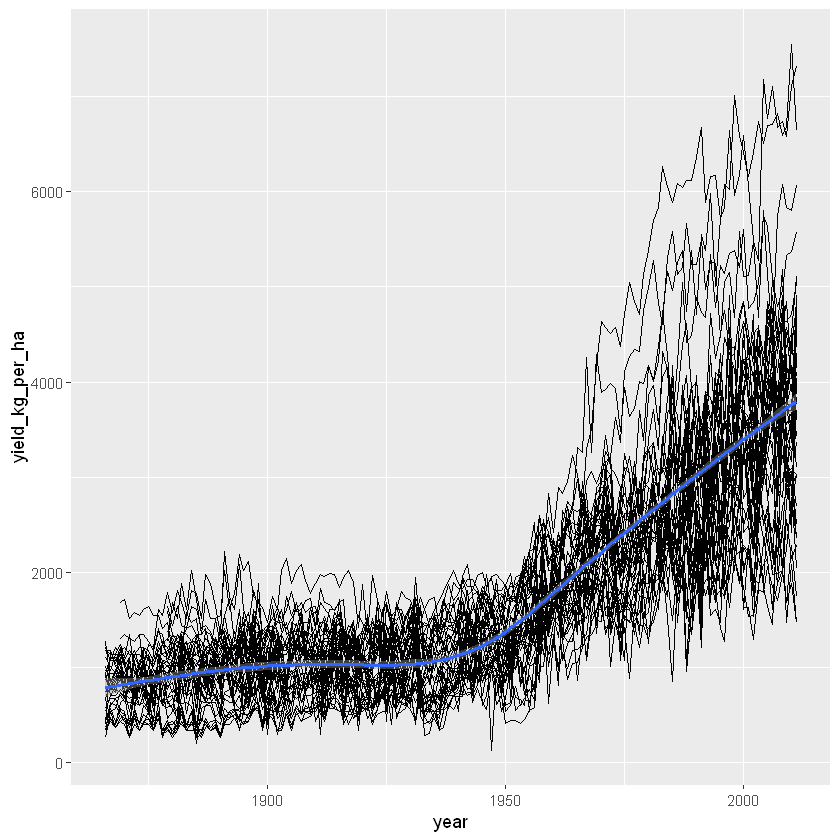

In [31]:
# Wrap this plotting code into a function
plot_yield_vs_year <- function(data){
  ggplot(data, aes(year, yield_kg_per_ha)) +
    geom_line(aes(group = state)) +
    geom_smooth()
}

# Test it on the wheat dataset
plot_yield_vs_year(wheat)

### Running a model
The smooth trend line you saw in the plots of yield over time use a generalized additive model (GAM) 
to determine where the line should lie. This sort of model is ideal for fitting nonlinear curves. 
So we can make predictions about future yields, let's explicitly run the model. The syntax for running 
this GAM takes the following form.
gam(response ~ s(explanatory_var1) + explanatory_var2, data = dataset)
Here, s() means "make the variable smooth", where smooth very roughly means nonlinear.

In [36]:
# need mgcv packages
# install.packages("mgcv")
library(mgcv)

# Run a generalized additive model of 
# yield vs. smoothed year 
corn_model = gam(yield_kg_per_ha ~ s(year), data = corn)
corn_model
# Wrap the model code into a function
run_gam_yield_vs_year<- function(data){
  gam(yield_kg_per_ha ~ s(year), data = data)
}

# Try it on the wheat dataset
wheat_model = run_gam_yield_vs_year(wheat)
wheat_model


Family: gaussian 
Link function: identity 

Formula:
yield_kg_per_ha ~ s(year)

Estimated degrees of freedom:
7.29  total = 8.29 

GCV score: 1201604     


Family: gaussian 
Link function: identity 

Formula:
yield_kg_per_ha ~ s(year)

Estimated degrees of freedom:
6.63  total = 7.63 

GCV score: 390595.8     